In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [2]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [3]:
scale_factor = 1000.0

# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

### Build and Train model functions

In [4]:
def build_model(my_learning_rate):

  model = tf.keras.models.Sequential()


  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model

In [5]:
def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  epochs = history.epoch
  
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history

### Plot Root Mean Squared Error vs Epoch function

In [6]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()

### Experiment

Epoch 1/30
119/119 [==============================] - 1s 3ms/step - loss: 42969.7383 - root_mean_squared_error: 207.2914 - val_loss: 45024.1719 - val_root_mean_squared_error: 212.1890
Epoch 2/30
119/119 [==============================] - 0s 1ms/step - loss: 27162.1426 - root_mean_squared_error: 164.8094 - val_loss: 27982.9277 - val_root_mean_squared_error: 167.2810
Epoch 3/30
119/119 [==============================] - 0s 1ms/step - loss: 15962.4609 - root_mean_squared_error: 126.3426 - val_loss: 16162.9102 - val_root_mean_squared_error: 127.1334
Epoch 4/30
119/119 [==============================] - 0s 1ms/step - loss: 9356.3467 - root_mean_squared_error: 96.7282 - val_loss: 9504.1055 - val_root_mean_squared_error: 97.4890
Epoch 5/30
119/119 [==============================] - 0s 1ms/step - loss: 6962.2529 - root_mean_squared_error: 83.4401 - val_loss: 7699.8589 - val_root_mean_squared_error: 87.7488
Epoch 6/30
119/119 [==============================] - 0s 1ms/step - loss: 6779.2935 - ro

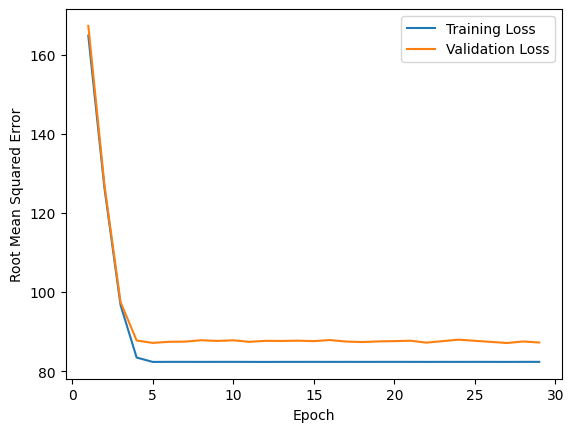

In [7]:
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.3

# Identify the feature and the label.
my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

In [8]:
train_df.head(n=1000)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5
...,...,...,...,...,...,...,...,...,...
995,-117.1,32.5,8.0,6533.0,1217.0,4797.0,1177.0,4.0,144.4
996,-117.1,34.6,6.0,5110.0,1044.0,1938.0,724.0,3.2,112.8
997,-117.1,34.2,22.0,4397.0,931.0,1145.0,445.0,4.5,108.4
998,-117.1,34.0,24.0,4144.0,826.0,2127.0,772.0,2.5,96.0


### Shuffling data

Epoch 1/15
119/119 [==============================] - 0s 2ms/step - loss: 45092.4414 - root_mean_squared_error: 212.3498 - val_loss: 33944.7422 - val_root_mean_squared_error: 184.2410
Epoch 2/15
119/119 [==============================] - 0s 1ms/step - loss: 28585.0801 - root_mean_squared_error: 169.0712 - val_loss: 20340.8867 - val_root_mean_squared_error: 142.6215
Epoch 3/15
119/119 [==============================] - 0s 1ms/step - loss: 16894.0801 - root_mean_squared_error: 129.9772 - val_loss: 11392.4141 - val_root_mean_squared_error: 106.7353
Epoch 4/15
119/119 [==============================] - 0s 1ms/step - loss: 9939.0127 - root_mean_squared_error: 99.6946 - val_loss: 7067.8101 - val_root_mean_squared_error: 84.0703
Epoch 5/15
119/119 [==============================] - 0s 1ms/step - loss: 7454.5264 - root_mean_squared_error: 86.3396 - val_loss: 6431.8774 - val_root_mean_squared_error: 80.1990
Epoch 6/15
119/119 [==============================] - 0s 1ms/step - loss: 7262.3174 - ro

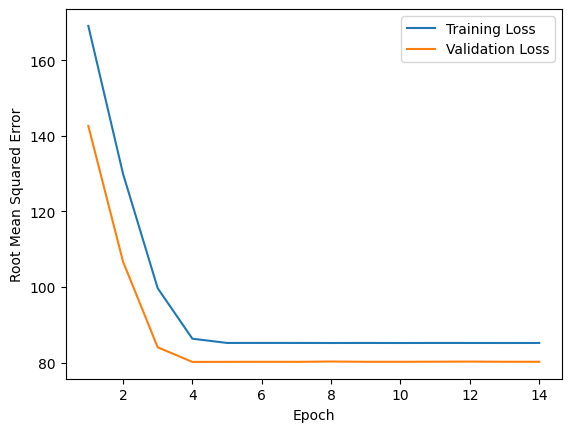

In [9]:
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))

learning_rate = 0.08
epochs = 15
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.3

# Identify the feature and the label.
my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

### Test data evaluation

In [10]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 1ms/step - loss: 7009.0288 - root_mean_squared_error: 83.7199
